# Preperation of the Data Set

In [79]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib



music_data = pd.read_csv('music.csv')
input_dataset = music_data.drop(columns = ['genre']) #Here split the data into desired input data 
output_dataset = music_data['genre'] #this would be the output data in which what you want the machine learning to understand

model = DecisionTreeClassifier()
model.fit(input_dataset, output_dataset)
prediction = model.predict([[21, 1], [22, 0]])
prediction

array(['HipHop', 'Dance'], dtype=object)

What this did here was to essentially split up the data into input and output. For intance, a 20-25 male (1 being the male gender whereas 0 is female gender) would like HipHop music. Since seen here there isnt a 21 year old, what this does is itll read that from 20,23,25 year old males like HipHop, itll try to predict a 21 year old would like hiphop.

since this model is so simple, we use a DecisionTreeClassifier and here it was able to predict correctly. 

# Score of Model

In [72]:
input_dataset_train, input_dataset_test, output_dataset_train, output_dataset_test = train_test_split(input_dataset, output_dataset, test_size = 0.2) #this forms it into a tuple so we can store multiple variable here
model = DecisionTreeClassifier()
model.fit(input_dataset_train, output_dataset_train)
predictions = model.predict(input_dataset_test)

score = accuracy_score(output_dataset_test, predictions)
score


1.0

Here we are actually doing some training to our data and them storing them into 

input_dataset_train, input_dataset_test, output_dataset_train, output_dataset_test

we also predict scores here. since this dataset is so small, the accuracy score is all over the place. 

# Persisting Models

In [83]:
new_model = joblib.load('music-reccommender.joblib')
predictions = new_model.predict([[21,1]])
predictions

array(['HipHop'], dtype=object)

# Visualizing a Decision Tree

[Text(209.25, 190.26, 'age <= 30.5\ngini = 0.778\nsamples = 18\nvalue = [3, 6, 3, 3, 3]\nclass = Classical'),
 Text(167.4, 135.9, 'age <= 25.5\ngini = 0.75\nsamples = 12\nvalue = [3, 0, 3, 3, 3]\nclass = Acoustic'),
 Text(83.7, 81.53999999999999, 'gender <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [0, 0, 3, 3, 0]\nclass = Dance'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0]\nclass = Dance'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 3, 0]\nclass = HipHop'),
 Text(251.10000000000002, 81.53999999999999, 'gender <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 0, 0, 0, 3]\nclass = Acoustic'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = Acoustic'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]\nclass = Jazz'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0]\nclass = Classical')]

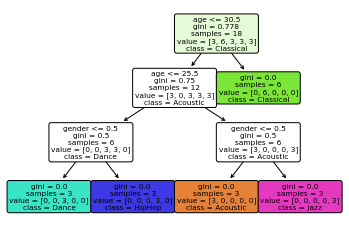

In [84]:
from sklearn import tree

tree.plot_tree(model, feature_names = ['age', 'gender'], 
                     class_names = sorted(output_dataset.unique()), label = 'all', rounded= True, filled = True)